In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [30]:
df = pd.read_csv('bankruptdata.csv')

In [31]:
df

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [32]:
shape= df.shape()
print(shape)

TypeError: 'tuple' object is not callable

In [ ]:
_, axes = plt.subplots(6,5, figsize=(15, 15))
not_bankrupt = [df.Bankrupt== 0]
is_bankrupt = [df.Bankrupt== 1]
ax = axes.ravel()                     # flatten the 2D array
for i in range(95):                   # for each of the 30 features
    bins = 20
    #---plot histogram for each feature---
    ax[i].hist(not_bankrupt[:i], bins=bins, color='r', alpha=.5)
    ax[i].hist(is_bankrupt[:i], bins=bins, color='b', alpha=0.3)
    #---set the title---
    #---display the legend---
    ax[i].legend(['not_bankrupt','is_bankrupt'], loc='best', fontsize=8)
    
plt.tight_layout()
plt.show()

In [ ]:
df.info()

In [ ]:
df['Bankrupt'].value_counts()

In [ ]:
data = df["Bankrupt"].value_counts()
plt.pie(data,autopct='%1.2f%%',labels=data.index)
plt.show()

In [ ]:
X = df.copy() 

y = df['Bankrupt']

X = X.drop(['Bankrupt'], axis=1)

# Check for collinearity

In [ ]:
df_corr = df.corr()['Bankrupt'].abs().sort_values(ascending=False)
df_corr

In [ ]:
# get all the features that has at least 0.1 in correlation to the 
# target
features = df_corr[df_corr > 0.1].index.to_list()[1:]
len(features)                         

# Multicolinearity: VIF >5 means high multi collinearity

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df,features)

In [ ]:
df2 = calculate_vif(df, features)
df2

In [ ]:
calculate_vif(df, features)['VIF'].sort_values()





In [ ]:
features_to_remove = df2.loc[df2['VIF'] < 5]
features_to_remove



In [ ]:
X = df.copy() 

y = df['Bankrupt']

X = X.drop(['Bankrupt'], axis=1)

In [ ]:
X.columns

In [ ]:
X

In [ ]:
import numpy as np
var = np.var(X)

In [ ]:
print(var)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
X_train.shape, X_test.shape

((5455, 95), (1364, 95))

In [38]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
#1. Logestic Regression
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(random_state = 42)
lgclassifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = lgclassifier.predict(X_test)
print(y_pred)

In [ ]:
y_pred = lgclassifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
c_matrix = confusion_matrix(y_test,y_pred)
#print confusion matrix
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

In [ ]:
y_val_scores = lgclassifier.predict_proba(X_test)
print(y_val_scores)

y_train_scores = lgclassifier.predict_proba(X_train)
print(y_train_scores)

In [ ]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_val_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('AUC: ' + str(auc))

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print("Accuracy score for Logistic Regression Model: {:.2f} %".format(acc1*100))

In [ ]:
predictions_val = lgclassifier.predict(X_test)
predictions_train = lgclassifier.predict(X_train)

In [ ]:
from sklearn. metrics import classification_report

print('Validation Data Classification Report \n', classification_report(y_test, predictions_val))
print('Train Data Classification Report \n', classification_report(y_train, predictions_train))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('AUC: ' + str(auc))

In [ ]:
resultsLogisticRegression = pd.DataFrame({'Train Accuracy': accuracy_score(y_train, predictions_train),
              'Test Accuracy': accuracy_score(y_test, predictions_val),
              'Train F1 Score':f1_score(y_train, predictions_train),
              'Test F1 Score':f1_score(y_test, predictions_val),
              'Train Precision':precision_score(y_train, predictions_train),
              'Test Precision': precision_score(y_test, predictions_val),
              'Train Recall':recall_score(y_train, predictions_train),
              'Test Recall': recall_score(y_test, predictions_val),
              'ROC AUC':auc},
             index=['LogisticRegression'])
resultsLogisticRegression

In [ ]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc3 = accuracy_score(y_test, y_pred)
print("Best Accuracy of K-NN: {:.2f} %".format(acc3*100))

In [ ]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred_test=knn_model.predict(X_test)
    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
print(test_error_rates.index(min(test_error_rates)))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel("Error Rate")
plt.xlabel("K Neighbors")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Random Forest Classification accuracy: {acc6}")

# PCA

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
c_matrix = confusion_matrix(y_test,y_pred)
#print confusion matrix
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print("Accuracy score for Logistic Regression Model: {:.2f} %".format(acc1*100))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
predictions_val = classifier.predict(X_test)
predictions_train = classifier.predict(X_train)

In [ ]:
from sklearn. metrics import classification_report
print('Validation Data Classification Report \n', classification_report(y_test, predictions_val))

In [ ]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_val_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('AUC: ' + str(auc))

In [ ]:
resultsLogisticRegression = pd.DataFrame({'Train Accuracy': accuracy_score(y_train, predictions_train),
              'Test Accuracy': accuracy_score(y_test, predictions_val),
              'Train F1 Score':f1_score(y_train, predictions_train),
              'Test F1 Score':f1_score(y_test, predictions_val),
              'Train Precision':precision_score(y_train, predictions_train),
              'Test Precision': precision_score(y_test, predictions_val),
              'Train Recall':recall_score(y_train, predictions_train),
              'Test Recall': recall_score(y_test, predictions_val),
              'ROC AUC':auc},
             index=['LogisticRegression'])
resultsLogisticRegression

# FEATURE SELECTION

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.03167778, 0.03278413, 0.02813569, 0.01176589, 0.01110091,
       0.01742705, 0.02820331, 0.0270009 , 0.0254685 , 0.03328902,
       0.00136568, 0.00065967, 0.01101956, 0.0029516 , 0.01533967,
       0.03069397, 0.02855199, 0.02851541, 0.03981744, 0.00459077,
       0.00346459, 0.01875716, 0.03635264, 0.00632062, 0.00272999,
       0.01207446, 0.01167558, 0.00974294, 0.0117682 , 0.0294399 ,
       0.00936563, 0.00038547, 0.01888109, 0.02083448, 0.03343838,
       0.02576154, 0.03021215, 0.03014725, 0.0096953 , 0.03457318,
       0.00282141, 0.01759079, 0.03554352, 0.00493311, 0.00439466,
       0.        , 0.00719013, 0.        , 0.00188173, 0.        ,
       0.        , 0.01587716, 0.00505685, 0.02127827, 0.00585749,
       0.        , 0.01267185, 0.01611761, 0.01119298, 0.0181655 ,
       0.01349973, 0.01624097, 0.0026556 , 0.00140563, 0.02012045,
       0.02350751, 0.00640262, 0.02956495, 0.02810724, 0.00756054,
       0.        , 0.        , 0.01213132, 0.00538583, 0.00328

#the smaller the value of the mi, the less information we can infer from the feature about the target

Text(0, 0.5, 'Mutual Information')

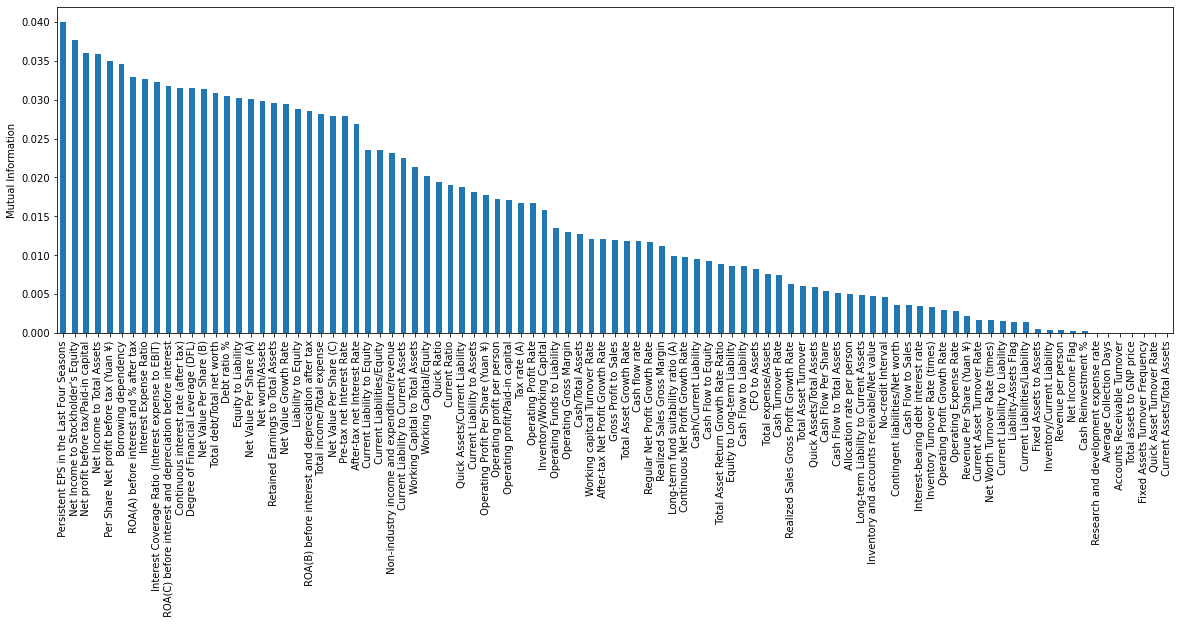

In [54]:
# the less mi value, the less information we can get from
mi = mutual_info_classif(X_train, y_train)
miseries = pd.Series(mi)
miseries
miseries.index = X_train.columns
miseries.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

#There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

There are a few ways in which this can be done:

Select top k features, where k is an arbitrary number of features

In [56]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index([' ROA(C) before interest and depreciation before interest',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')

In [60]:
class_count_0, class_count_1= df['Bankrupt'].value_counts()
print("class 0 count: ", class_count_0, "class 1 count:", class_count_1)
# Separate class
class_0 = df[df['Bankrupt'] == 0]
class_1 = df[df['Bankrupt'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0 count:  6599 class 1 count: 220
class 0: (6599, 96)
class 1: (220, 96)


In [61]:
class_1.sample(class_count_0, replace = True).shape

(6599, 96)

In [62]:
# Oversample 1-class and concat the DataFrames of both classes
class_1_over = class_1.sample(class_count_0, replace=True)
df_test_over = pd.concat([class_0, class_1_over], axis=0)



In [63]:
print(df_test_over['Bankrupt'].value_counts())

0    6599
1    6599
Name: Bankrupt, dtype: int64


In [64]:
X_over = df_test_over.copy()
y_over = df_test_over['Bankrupt']
X_over = X_over.drop(['Bankrupt'], axis=1)

In [65]:
X = df_test_over.drop('Bankrupt',axis='columns')
y = df_test_over['Bankrupt']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
X_train.shape, X_test.shape

((10558, 95), (2640, 95))

Text(0, 0.5, 'Mutual Information')

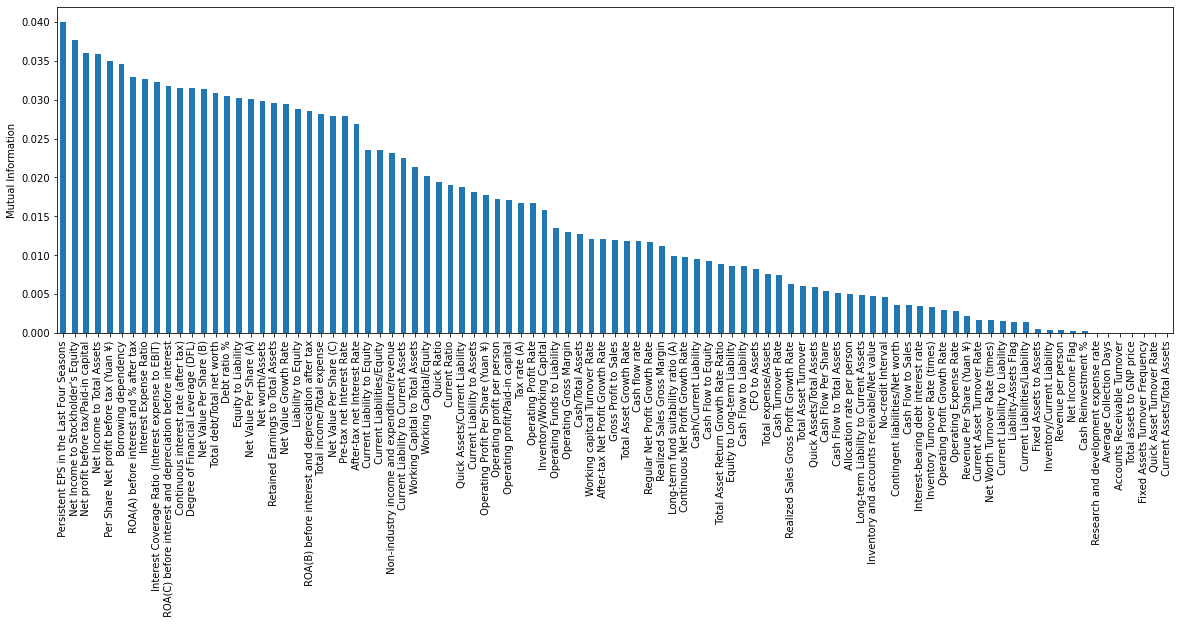

In [66]:
miseries = pd.Series(mi)
miseries
miseries.index = X_train.columns
miseries.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [67]:
# select features
k_best = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[k_best.get_support()]

Index([' Net profit before tax/Paid-in capital', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Current Liability to Equity',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Liability to Equity', ' Equity to Liability'],
      dtype='object')

In [68]:
# remove the rest of the features:
X_train = k_best.transform(X_train)
X_test = k_best.transform(X_test)
X_train.shape,X_test.shape

((10558, 10), (2640, 10))

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
lgclassifier = LogisticRegression(random_state = 42)
lgclassifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [74]:
y_pred = lgclassifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [75]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}", "\nthe accuracy rate is lower after rebalancing using under sampling")

Accuracy: 0.8337121212121212 
the accuracy rate is lower after rebalancing using under sampling


[[1132  188]
 [ 251 1069]]


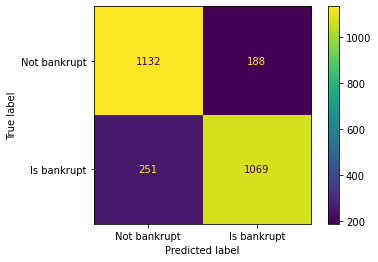

In [76]:
c_matrix = confusion_matrix(y_test,y_pred)
#print confusion matrix
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

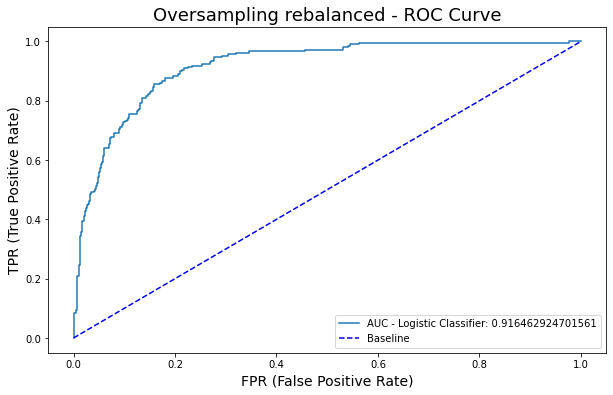

In [77]:
#plots the ROC curves
plt.figure(figsize=(10, 6))
lg_probabilities = lgclassifier.predict_proba(X_test)[:, 1]

lg_auc = roc_auc_score(y_test, lg_probabilities)
lg_fpr, lg_tpr, lg_thresholds = roc_curve(y_test, lg_probabilities)
plt.plot(lg_fpr, lg_tpr, label=f"AUC - Logistic Classifier: {lg_auc}")

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')

plt.xlabel('FPR (False Positive Rate)', size=14)
plt.ylabel('TPR (True Positive Rate)', size=14)
plt.title('Oversampling rebalanced - ROC Curve', size=18)
plt.legend()

In [79]:
y_val_scores = lgclassifier.predict_proba(X_test)
print(y_val_scores)

y_train_scores = lgclassifier.predict_proba(X_train)
print(y_train_scores)

[[0.78843311 0.21156689]
 [0.86459114 0.13540886]
 [0.9817026  0.0182974 ]
 ...
 [0.98277801 0.01722199]
 [0.8749462  0.1250538 ]
 [0.48053531 0.51946469]]
[[0.35426496 0.64573504]
 [0.92962119 0.07037881]
 [0.86131765 0.13868235]
 ...
 [0.83955673 0.16044327]
 [0.67564161 0.32435839]
 [0.20915999 0.79084001]]


In [81]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.916462924701561


In [82]:
predictions_val = lgclassifier.predict(X_test)

In [83]:
from sklearn. metrics import classification_report

print('Validation Data Classification Report \n', classification_report(y_test, predictions_val))

Validation Data Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1320
           1       0.85      0.81      0.83      1320

    accuracy                           0.83      2640
   macro avg       0.83      0.83      0.83      2640
weighted avg       0.83      0.83      0.83      2640



In [84]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1232   88]
 [   0 1320]]


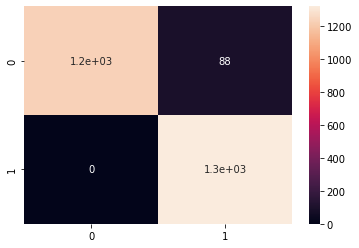

Best Accuracy of K-NN: 96.67 %


In [86]:
sns.heatmap(cm,annot=True)
plt.show()
acc3 = accuracy_score(y_test, y_pred)
print("Best Accuracy of K-NN: {:.2f} %".format(acc3*100))

In [87]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred_test=knn_model.predict(X_test)
    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
print(test_error_rates.index(min(test_error_rates)))

0


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1320
           1       0.94      1.00      0.97      1320

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640



Text(0.5, 0, 'K Neighbors')

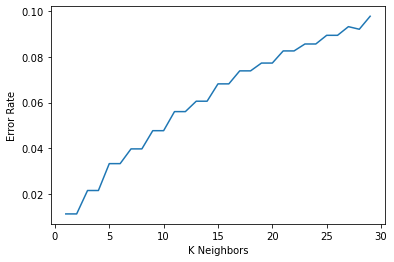

In [89]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel("Error Rate")
plt.xlabel("K Neighbors")

In [90]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [91]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)

[[1297   23]
 [   0 1320]]


In [92]:
print(f"Random Forest Classification accuracy: {acc6}")

Random Forest Classification accuracy: 0.9912878787878788


[[1297   23]
 [   0 1320]]


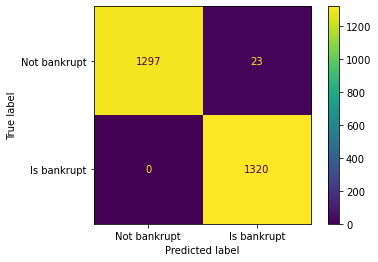

In [93]:
c_matrix = confusion_matrix(y_test,y_pred)
#print confusion matrix
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1320
           1       0.98      1.00      0.99      1320

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640



 # Oversampling blindly copies the current samples to create new samples
 

# SMOTE:- Creates new samples from current samples usinng K nearest neighbours algorithm

In [95]:
X = df.drop('Bankrupt',axis='columns')
y = df['Bankrupt']

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
oversample = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    6599
0    6599
Name: Bankrupt, dtype: int64

# TRAIN and SPLIT

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [98]:
# Number of classes in training Data
y_train.value_counts()

1    5279
0    5279
Name: Bankrupt, dtype: int64

# Feature selection

Text(0, 0.5, 'Mutual Information')

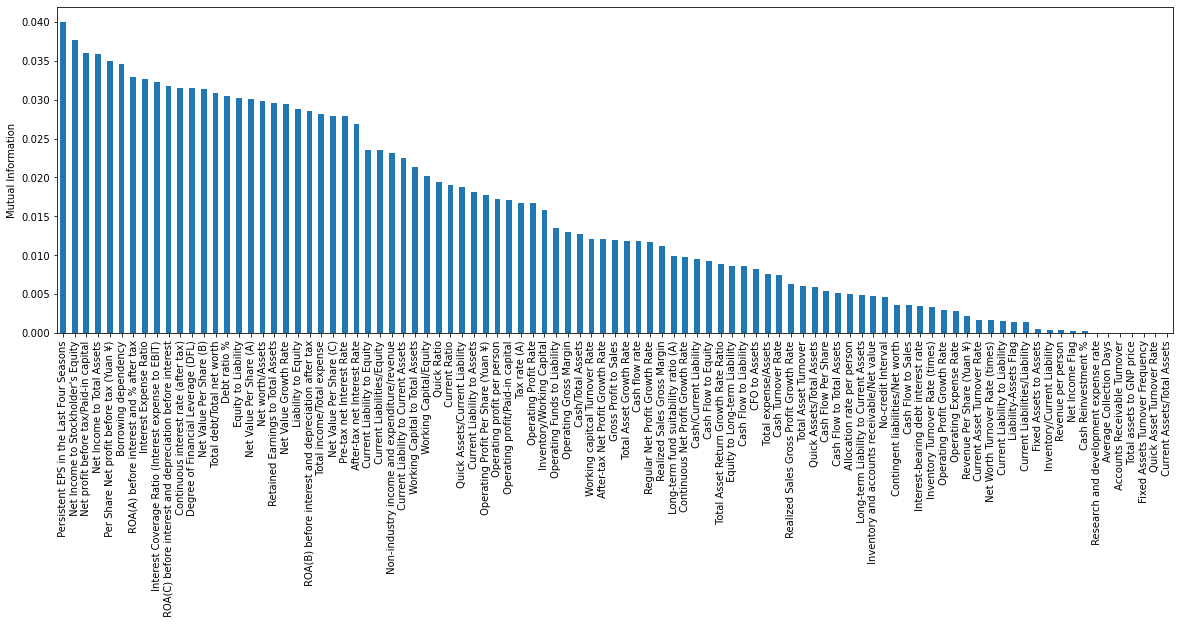

In [99]:
miseries = pd.Series(mi)
miseries
miseries.index = X_train.columns
miseries.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [100]:
# select features
k_best = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[k_best.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Total Asset Growth Rate',
       ' Borrowing dependency', ' Total Asset Turnover',
       ' Net Worth Turnover Rate (times)', ' Net Income to Total Assets'],
      dtype='object')

In [101]:
# remove the rest of the features:
X_train = k_best.transform(X_train)
X_test = k_best.transform(X_test)
X_train.shape,X_test.shape

((10558, 10), (2640, 10))

# Feature Scaling

In [102]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
lgclassifier = LogisticRegression(random_state = 42)
lgclassifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [104]:
y_pred = lgclassifier.predict(X_test)
print(y_pred)

[1 1 0 ... 0 0 1]


In [105]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}", "\nthe accuracy rate is increased after rebalancing using under sampling")

Accuracy: 0.8848484848484849 
the accuracy rate is increased after rebalancing using under sampling


[[1159  161]
 [ 143 1177]]


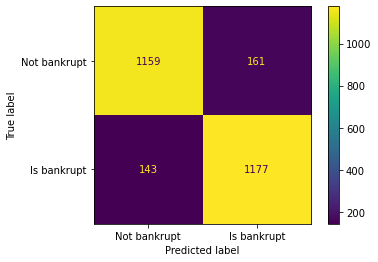

In [106]:
c_matrix = confusion_matrix(y_test,y_pred)
#print confusion matrix
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

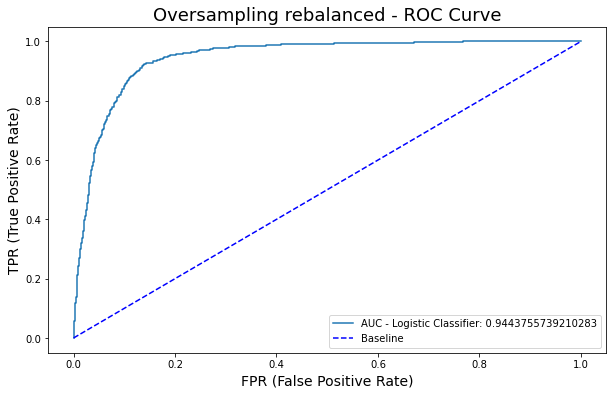

In [107]:
#plots the ROC curves
plt.figure(figsize=(10, 6))
lg_probabilities = lgclassifier.predict_proba(X_test)[:, 1]

lg_auc = roc_auc_score(y_test, lg_probabilities)
lg_fpr, lg_tpr, lg_thresholds = roc_curve(y_test, lg_probabilities)
plt.plot(lg_fpr, lg_tpr, label=f"AUC - Logistic Classifier: {lg_auc}")

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')

plt.xlabel('FPR (False Positive Rate)', size=14)
plt.ylabel('TPR (True Positive Rate)', size=14)
plt.title('Oversampling rebalanced - ROC Curve', size=18)
plt.legend()

In [108]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.916462924701561


In [109]:
predictions_val = lgclassifier.predict(X_test)

In [110]:
from sklearn. metrics import classification_report

print('Validation Data Classification Report \n', classification_report(y_test, predictions_val))

Validation Data Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1320
           1       0.88      0.89      0.89      1320

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



# KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1169  151]
 [  20 1300]]


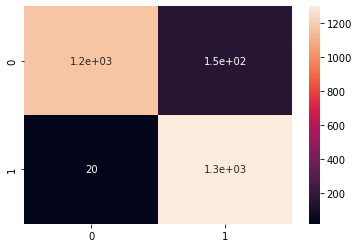

Best Accuracy of K-NN: 93.52 %


In [113]:
sns.heatmap(cm,annot=True)
plt.show()
acc3 = accuracy_score(y_test, y_pred)
print("Best Accuracy of K-NN: {:.2f} %".format(acc3*100))

In [114]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred_test=knn_model.predict(X_test)
    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
print(test_error_rates.index(min(test_error_rates)))

0


In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1320
           1       0.90      0.98      0.94      1320

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640



Text(0.5, 0, 'K Neighbors')

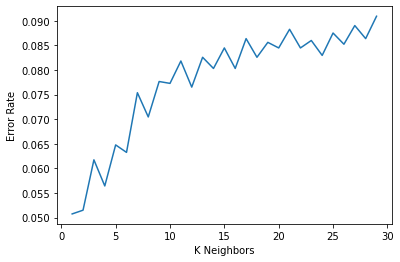

In [116]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel("Error Rate")
plt.xlabel("K Neighbors")

# Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [118]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)


[[1247   73]
 [  42 1278]]


In [119]:
print(f"Random Forest Classification accuracy: {acc6}")

Random Forest Classification accuracy: 0.9564393939393939


[[1247   73]
 [  42 1278]]


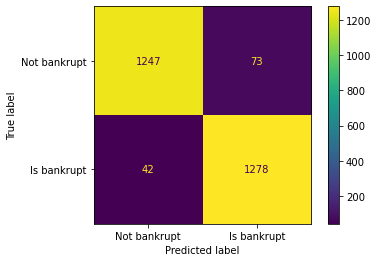

In [120]:
c_matrix = confusion_matrix(y_test,y_pred)
#print confusion matrix
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()


In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1320
           1       0.95      0.97      0.96      1320

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640

